In [24]:
'''
This script is for 3-D visualization problem 7
'''
# import packages needed
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame, Series
from mpl_toolkits.mplot3d import Axes3D


In [19]:
#read in the data
lipids = pd.read_csv("lipids.csv", skiprows = [0, 1, 2, 3])
lipids = lipids[lipids['diseased'].values == 1]
del lipids['diseased']
lipids_all = lipids.stack()


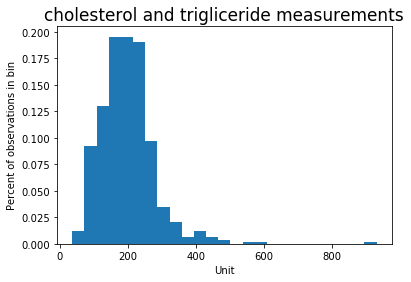

In [23]:
d2fig = plt.figure()
num_bins = 25
weights = (1 / lipids_all.shape[0]) * np.ones_like(lipids_all)
n, bin_cuts, patches = plt.hist(lipids_all, num_bins, weights=weights)
plt.title('cholesterol and trigliceride measurements', fontsize=17)
plt.xlabel(r'Unit')
plt.ylabel(r'Percent of observations in bin')
plt.show()

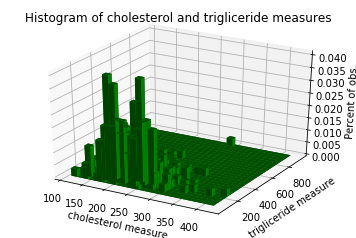

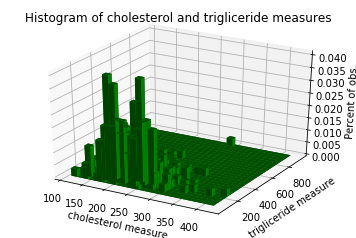

In [28]:
# D3 chart
chol = lipids['chol']
trig = lipids['trig']

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = 25
hist, xedges, yedges = np.histogram2d(chol, trig, bins=bin_num)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel('cholesterol measure')
ax.set_ylabel('trigliceride measure')
ax.set_zlabel('Percent of obs.')
plt.title('Histogram of cholesterol and trigliceride measures')
plt.show()

In [26]:
lipids

,chol,trig
51,184,145
52,263,142
53,185,115
54,271,128
55,173,56
56,230,304
57,222,151
58,215,168
59,233,340
60,212,171
